In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
from NFconstants import N_nod, Beta
from transforms import t_get_O
from flows.NormalizingFlow import NormalizingFlow    
from flows.RGflows import RGflows 
from transforms import config_RG_masks
from setup import osc
from obs import G
normal_dist = torch.distributions.Normal(loc=torch.zeros(N_nod,2), scale=torch.ones(N_nod,2))

In [13]:
from samplers.Metropolis import Metropolis
N_samp = 100
z = torch.normal(mean=torch.zeros(N_samp,N_nod,2), std=torch.ones(N_samp,N_nod,2))
M = Metropolis(osc,N_samp,d=4/N_nod,N_sweep=1000000,log_per=10000,filename="./trajs_and_corr/0.txt")
M.run(z)

tensor(1.0106) 0 0
tensor(0.4755) tensor(0.5900) 0
tensor(0.5226) tensor(0.4800) 0
tensor(0.5122) tensor(0.6300) 0
tensor(0.5027) tensor(0.5400) 0
tensor(0.5070) tensor(0.5600) 0
tensor(0.4804) tensor(0.5400) 0
tensor(0.4957) tensor(0.5100) 0
tensor(0.4858) tensor(0.5300) 0
tensor(0.4899) tensor(0.5700) 0
tensor(0.5030) tensor(0.6100) 0
tensor(0.4952) tensor(0.6300) 0
tensor(0.5203) tensor(0.6300) 0
tensor(0.5109) tensor(0.5900) 0
tensor(0.5131) tensor(0.5800) 0
tensor(0.5063) tensor(0.5500) 0
tensor(0.4956) tensor(0.5600) 0
tensor(0.4862) tensor(0.6100) 0
tensor(0.5024) tensor(0.5500) 0
tensor(0.4861) tensor(0.5900) 0
tensor(0.4917) tensor(0.5000) 0
tensor(0.4821) tensor(0.5900) 0
tensor(0.4925) tensor(0.5400) 0
tensor(0.4947) tensor(0.4700) 0
tensor(0.5093) tensor(0.5300) 0
tensor(0.4864) tensor(0.6100) 0
tensor(0.4833) tensor(0.5200) 0
tensor(0.4926) tensor(0.5300) 0
tensor(0.5136) tensor(0.6300) 0
tensor(0.4835) tensor(0.5600) 0
tensor(0.4740) tensor(0.4700) 0
tensor(0.5027) tensor

ValueError: Expected 1D or 2D array, got 3D array instead

In [15]:
#z = torch.torch.tensor(np.genfromtxt("./trajs_and_corr/0.txt")).double()
print(z.shape)
g=G(z[:,:,0])

torch.Size([100, 64, 2])


100%|████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 3564.45it/s]


In [14]:
g_ur = np.genfromtxt("./trajs_and_corr/g_ur N=256 Beta=16")

In [16]:
from systems.Nonrel.osc_andist import calc_G
g_osc=calc_G(N_nod,Beta,N_nod)

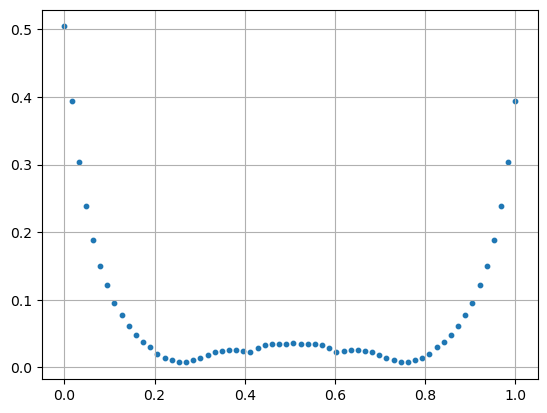

In [17]:
plt.figure()
plt.scatter(np.linspace(0,1,len(g)),g,s=10)
#plt.scatter(np.linspace(0,1,len(g_ur)),g_ur,s=10)
plt.grid(True)
#plt.savefig("./pictures/anh_green1")
plt.show()

In [57]:
print(g[0])

0.24953408189880144


In [ ]:
import torch
from samplers.Langevin import Langevin
N_samp=1000
z=torch.normal(mean=torch.zeros(N_samp,N_nod), std=torch.ones(N_samp,N_nod))
L=Langevin(ur,N_samp,eps=0.0001,N_sweep=1000000,log_per=1000)
L.run(z)

In [5]:
from flows.theta import ThetaNetwork
dim = 2
th = ThetaNetwork(
        N_nod//2 * dim,
        N_nod//2 * dim,
        6,
        N_nod,
        2,
        0,
    )
z = torch.ones((10,N_nod//2,dim))
t,s = th(z)
print(t.shape)
print(s.shape)

torch.Size([10, 32, 2])
torch.Size([10, 32, 2])


In [6]:
from flows.Layers import AffineCouplingLayer
from transforms import get_split_masks
from transforms import get_pair_split_masks
z = torch.ones((10,N_nod,dim))
aff = AffineCouplingLayer(th, split = get_pair_split_masks(N_nod), swap = 0)
x,lad = aff.g(z)
print(x.shape)
print(lad.shape)

torch.Size([10, 64, 2])
torch.Size([10])


In [9]:
flows =  NormalizingFlow.configure_flows(n_flows = 10,
                                                     num_hidden = 8,
                                                     hidden_dim = N_nod, 
                                                     dim = N_nod, 
                                                     param_dim = 0, 
                                                     p_drop = 0,sys_dim = dim)
nf = NormalizingFlow(flows = flows)
x,lad = nf.g(z)
print(x.shape)
print(lad.shape)

torch.Size([10, 64, 2])
torch.Size([10])


In [11]:
m=3
RGmasks=config_RG_masks(m,N_nod)

In [13]:
hidden_dim_dict1={8:8,16:16,32:32,64:64,128:128,256:256,512:512}
n_flows_dict1={8:4,16:6,32:8,64:10,128:12,256:14,512:16}
num_hidden_dict1={8:6,16:6,32:6,64:8,128:8,256:8,512:10}

In [15]:
rg = RGflows.configure_RG_model(RGmasks,n_flows_dict1,num_hidden_dict1,hidden_dim_dict1,grids_no_grad=0,p_drop=0.0,sys_dim=2)
rg.save("./weights/model_weights_osc.pth")

In [17]:
rg = RGflows.load_model("./weights/model_weights_osc.pth")
z = torch.ones((10,N_nod,dim))
rg.g(z)

(tensor([[[ 8.0687,  7.3307],
          [ 2.9903, -0.2573],
          [-3.0988, -1.1003],
          ...,
          [-2.6756, -2.3893],
          [ 0.1174, -1.4540],
          [-1.3869, -3.9688]],
 
         [[ 8.0687,  7.3307],
          [ 2.9903, -0.2573],
          [-3.0988, -1.1003],
          ...,
          [-2.6756, -2.3893],
          [ 0.1174, -1.4540],
          [-1.3869, -3.9688]],
 
         [[ 8.0687,  7.3307],
          [ 2.9903, -0.2573],
          [-3.0988, -1.1003],
          ...,
          [-2.6756, -2.3893],
          [ 0.1174, -1.4540],
          [-1.3869, -3.9688]],
 
         ...,
 
         [[ 8.0687,  7.3307],
          [ 2.9903, -0.2573],
          [-3.0988, -1.1003],
          ...,
          [-2.6756, -2.3893],
          [ 0.1174, -1.4540],
          [-1.3869, -3.9688]],
 
         [[ 8.0687,  7.3307],
          [ 2.9903, -0.2573],
          [-3.0988, -1.1003],
          ...,
          [-2.6756, -2.3893],
          [ 0.1174, -1.4540],
          [-1.3869, -3.9688